In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.25)
plt.rcParams["figure.figsize"] = [8, 6]

In [14]:
data = pd.read_csv('timings_agg.csv')
categories = pd.read_csv("../../2phase_nsa/categories/ce_categories.csv")[["query","well_behaved"]].set_index("query")
data = pd.merge(data, categories, left_on="query", right_index=True)
data

,query,method,duration(s)_mean,duration(s)_median,hashjoin_time(s)_mean,hashjoin_time(s)_median,well_behaved
0,dblp_acyclic_201_00,DF-Bin,1.292136,1.291340,1.253745,1.253016,True
1594,dblp_acyclic_201_00,SYA,0.637914,0.638233,0.599591,0.599858,True
3188,dblp_acyclic_201_00,DuckDB-Bin,0.867648,0.859715,0.826000,0.824105,True
1,dblp_acyclic_201_01,DF-Bin,0.129688,0.129630,0.110419,0.110389,True
1595,dblp_acyclic_201_01,SYA,0.081931,0.081907,0.062678,0.062775,True
...,...,...,...,...,...,...,...
4793,yago_acyclic_tree_6_78,DuckDB-Bin,0.193438,0.193141,0.146068,0.144882,False
1593,yago_acyclic_tree_6_79,DF-Bin,0.005294,0.005318,0.004875,0.004905,True
3187,yago_acyclic_tree_6_79,SYA,0.002969,0.002956,0.002555,0.002548,True
4794,yago_acyclic_tree_6_79,DuckDB-Bin,0.016479,0.016519,0.015682,0.015697,True


In [15]:
# Create one table for each method (DuckDB-Bin, DF-Bin, SYA)
df_bin = data[data["method"] == "DF-Bin"].drop(columns=["method"]).set_index("query")
sya = data[data["method"] == "SYA"].drop(columns=["method"]).set_index("query") 
duckdb_bin = data[data["method"] == "DuckDB-Bin"].drop(columns=["method"]).set_index("query") 

In [17]:
merged = pd.merge(
    pd.merge(duckdb_bin,df_bin, on="query", suffixes=("_duckdbbin", "_dfbin")),
    sya.add_suffix("_sya"), on="query"
).drop(columns=["well_behaved_duckdbbin", "well_behaved_dfbin"]).rename(columns={"well_behaved_sya": "well_behaved"})
merged

,duration(s)_mean_duckdbbin,duration(s)_median_duckdbbin,hashjoin_time(s)_mean_duckdbbin,hashjoin_time(s)_median_duckdbbin,duration(s)_mean_dfbin,duration(s)_median_dfbin,hashjoin_time(s)_mean_dfbin,hashjoin_time(s)_median_dfbin,duration(s)_mean_sya,duration(s)_median_sya,hashjoin_time(s)_mean_sya,hashjoin_time(s)_median_sya,well_behaved
query,,,,,,,,,,,,,
dblp_acyclic_201_00,0.867648,0.859715,0.826000,0.824105,1.292136,1.291340,1.253745,1.253016,0.637914,0.638233,0.599591,0.599858,True
dblp_acyclic_201_01,0.152020,0.147681,0.125084,0.125715,0.129688,0.129630,0.110419,0.110389,0.081931,0.081907,0.062678,0.062775,True
dblp_acyclic_201_02,0.206569,0.205610,0.178390,0.179452,0.201509,0.200955,0.166934,0.166404,0.150796,0.150736,0.116670,0.116644,True
dblp_acyclic_201_03,0.591593,0.590417,0.561913,0.561459,0.844165,0.843552,0.805474,0.804855,0.419517,0.419907,0.381785,0.382166,True
dblp_acyclic_201_04,0.352022,0.350535,0.314565,0.313139,0.353416,0.352602,0.306617,0.305792,0.186757,0.186599,0.141050,0.140958,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
yago_acyclic_tree_6_75,0.248192,0.248308,0.204660,0.204962,0.114938,0.115007,0.094222,0.094247,0.137463,0.137628,0.115006,0.115146,True
yago_acyclic_tree_6_76,0.051917,0.052372,0.043599,0.043944,0.031876,0.031859,0.026433,0.026421,0.027468,0.027487,0.021034,0.020978,False
yago_acyclic_tree_6_77,0.028181,0.027772,0.025457,0.025055,0.023129,0.023131,0.022568,0.022578,0.004391,0.004387,0.003812,0.003820,False


In [18]:
# median and average runtimes
mean_median = pd.DataFrame({
    "median": merged.median(axis=0),
    "mean": merged.mean(axis=0)}
)
mean_median

,median,mean
duration(s)_mean_duckdbbin,0.138611,0.544319
duration(s)_median_duckdbbin,0.138004,0.541523
hashjoin_time(s)_mean_duckdbbin,0.120616,0.526019
hashjoin_time(s)_median_duckdbbin,0.120134,0.523514
duration(s)_mean_dfbin,0.081280,0.357472
duration(s)_median_dfbin,0.081110,0.357045
hashjoin_time(s)_mean_dfbin,0.066766,0.342019
hashjoin_time(s)_median_dfbin,0.066748,0.341628
duration(s)_mean_sya,0.058928,0.157685
duration(s)_median_sya,0.058914,0.157600


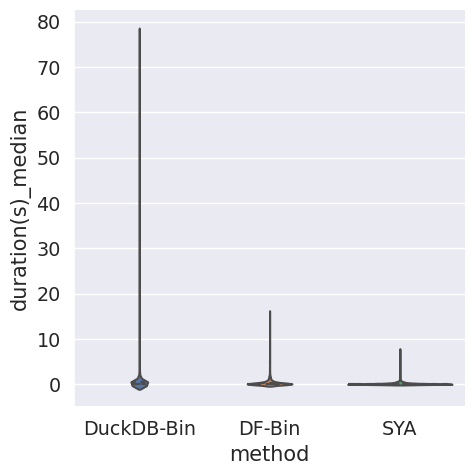

In [19]:
methods_order = ["DuckDB-Bin", "DF-Bin", "SYA"]
sns.catplot(data=data, x="method", y="duration(s)_median", order=methods_order, kind="violin", inner="quart")

In [20]:
mean_median.loc[mean_median.index.str.startswith("duration(s)_median")][["mean"]].transpose()

,duration(s)_median_duckdbbin,duration(s)_median_dfbin,duration(s)_median_sya
mean,0.541523,0.357045,0.1576


In [21]:
mean_median.loc[mean_median.index.str.startswith("duration(s)_median")][["median"]].transpose()

,duration(s)_median_duckdbbin,duration(s)_median_dfbin,duration(s)_median_sya
median,0.138004,0.08111,0.058914


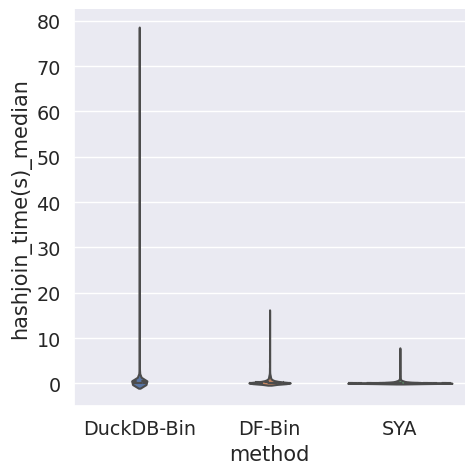

In [22]:
sns.catplot(data=data, x="method", y="hashjoin_time(s)_median", order=methods_order, kind="violin", inner="quart")

In [23]:
mean_median.loc[mean_median.index.str.startswith("hashjoin_time(s)_median")][["mean"]].transpose()

,hashjoin_time(s)_median_duckdbbin,hashjoin_time(s)_median_dfbin,hashjoin_time(s)_median_sya
mean,0.523514,0.341628,0.142717


In [24]:
mean_median.loc[mean_median.index.str.startswith("hashjoin_time(s)_median")][["median"]].transpose()

,hashjoin_time(s)_median_duckdbbin,hashjoin_time(s)_median_dfbin,hashjoin_time(s)_median_sya
median,0.120134,0.066748,0.044801


In [25]:
def scatterplot(data, x, y, label_col: str|None = None, min=1e-4, max=1e1):
    if label_col is not None:
        ax = sns.scatterplot(data, x=x, y=y, hue=data[label_col])
    else:
        ax = sns.scatterplot(data, x=x, y=y)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot([min, max], [min, max], color='grey', linestyle='-', alpha=0.5)
    return ax

def print_speedups(data: pd.DataFrame, x: str, y: str):
    max_slowdown = (data[y] / data[x]).max()
    max_slowdown_query = data[data[y] / data[x] == max_slowdown].index[0]
    x_time = data.loc[max_slowdown_query, x]
    y_time = data.loc[max_slowdown_query, y]
    print("Max. slowdown:      {:.3f}x \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_slowdown, max_slowdown_query, x_time, y_time))

    max_abs_slowdown = (data[y] - data[x]).max()
    max_abs_slowdown_query = data[(data[y] - data[x]) == max_abs_slowdown].index[0]
    x_time = data.loc[max_abs_slowdown_query, x]
    y_time = data.loc[max_abs_slowdown_query, y]
    print("Max. abs. slowdown: {:.3f}s \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_abs_slowdown, max_abs_slowdown_query, x_time, y_time))

    max_speedup = (data[x] / data[y]).max()
    max_speedup_query = data[data[x] / data[y] == max_speedup].index[0]
    x_time = data.loc[max_speedup_query, x]
    y_time = data.loc[max_speedup_query, y]
    print("Max. speedup:       {:.3f}x \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_speedup, max_speedup_query, x_time, y_time))

    max_abs_speedup = (data[x] - data[y]).max()
    max_abs_speedup_query = data[(data[x] - data[y]) == max_abs_speedup].index[0]
    x_time = data.loc[max_abs_speedup_query, x]
    y_time = data.loc[max_abs_speedup_query, y]
    print("Max. abs. speedup:  {:.3f}s \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_abs_speedup, max_abs_speedup_query, x_time, y_time))
    print("-----------------------------------------------")

def print_stats(ratio_col: pd.Series, epsilon: float = 0.01):
    n_rows = len(ratio_col)
    n_above = ratio_col[ratio_col > 1+epsilon].shape[0]
    n_below = ratio_col[ratio_col < 1-epsilon].shape[0]
    n_equal = ratio_col[(ratio_col >= 1-epsilon) & (ratio_col <= 1+epsilon)].shape[0]

    print(f"Total: {n_rows}, epsilon: {epsilon}")
    print("Number of dots above the line:", n_above, f"({n_above/n_rows*100:.2f}%)")
    print("Number of dots below the line:", n_below , f"({n_below/n_rows*100:.2f}%)")
    print("Number of dots on the line", n_equal, f"({n_equal/n_rows*100:.2f}%)")

## DuckDB vs DataFusion

Total: 1594, epsilon: 0.01
Number of dots above the line: 490 (30.74%)
Number of dots below the line: 1085 (68.07%)
Number of dots on the line 19 (1.19%)


<Axes: xlabel='hashjoin_time(s)_median_duckdbbin', ylabel='hashjoin_time(s)_median_dfbin'>

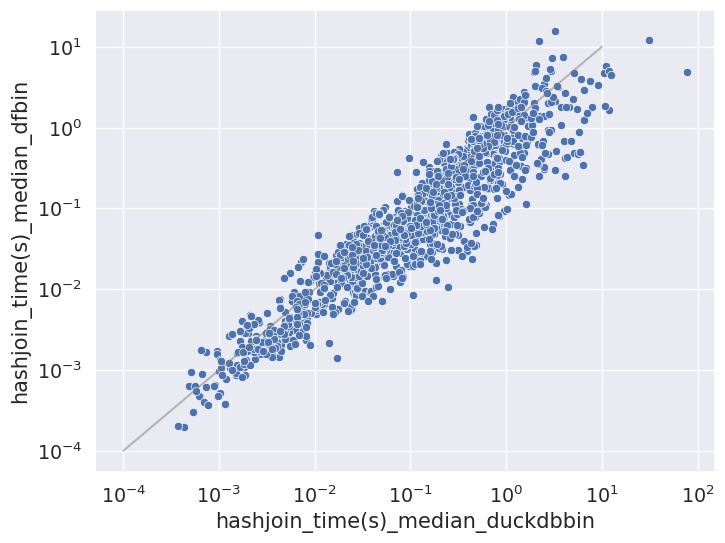

In [26]:
x = "hashjoin_time(s)_median_duckdbbin"
y = "hashjoin_time(s)_median_dfbin"
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y)

Total: 1594, epsilon: 0.01
Number of dots above the line: 468 (29.36%)
Number of dots below the line: 1100 (69.01%)
Number of dots on the line 26 (1.63%)


<Axes: xlabel='duration(s)_median_duckdbbin', ylabel='duration(s)_median_dfbin'>

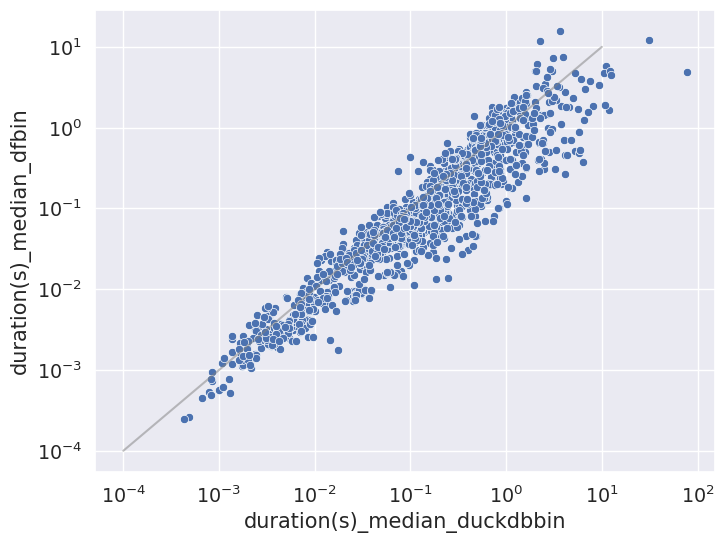

In [27]:
x = "duration(s)_median_duckdbbin"
y = "duration(s)_median_dfbin"
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y)

## DF-Bin v.s. SYA

In [29]:
# merged.loc[["33c","11d","8c"]][["duration(s)_median_dfbin","duration(s)_median_sya","hashjoin_time(s)_median_dfbin", "hashjoin_time(s)_median_sya"]]

Max. slowdown:      5.799x 	(query yago_acyclic_chain_12_73, x=0.136s, y=0.787s)
Max. abs. slowdown: 0.651s 	(query yago_acyclic_chain_12_73, x=0.136s, y=0.787s)
Max. speedup:       187.996x 	(query yago_acyclic_tree_6_48, x=0.109s, y=0.001s)
Max. abs. speedup:  15.477s 	(query watdiv_acyclic_210_07, x=15.804s, y=0.327s)
-----------------------------------------------
Total: 1594, epsilon: 0.01
Number of dots above the line: 182 (11.42%)
Number of dots below the line: 1400 (87.83%)
Number of dots on the line 12 (0.75%)


<Axes: xlabel='hashjoin_time(s)_median_dfbin', ylabel='hashjoin_time(s)_median_sya'>

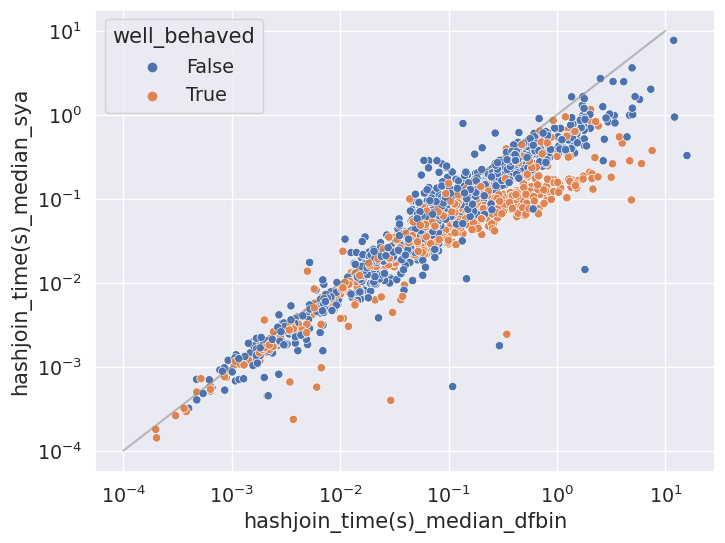

In [30]:
x = "hashjoin_time(s)_median_dfbin"
y = "hashjoin_time(s)_median_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")

Max. slowdown:      4.290x 	(query yago_acyclic_chain_12_73, x=0.199s, y=0.856s)
Max. abs. slowdown: 0.656s 	(query yago_acyclic_chain_12_73, x=0.199s, y=0.856s)
Max. speedup:       139.850x 	(query yago_acyclic_tree_6_48, x=0.109s, y=0.001s)
Max. abs. speedup:  15.487s 	(query watdiv_acyclic_210_07, x=15.830s, y=0.342s)
-----------------------------------------------
Total: 1594, epsilon: 0.01
Number of dots above the line: 185 (11.61%)
Number of dots below the line: 1392 (87.33%)
Number of dots on the line 17 (1.07%)


<Axes: xlabel='duration(s)_median_dfbin', ylabel='duration(s)_median_sya'>

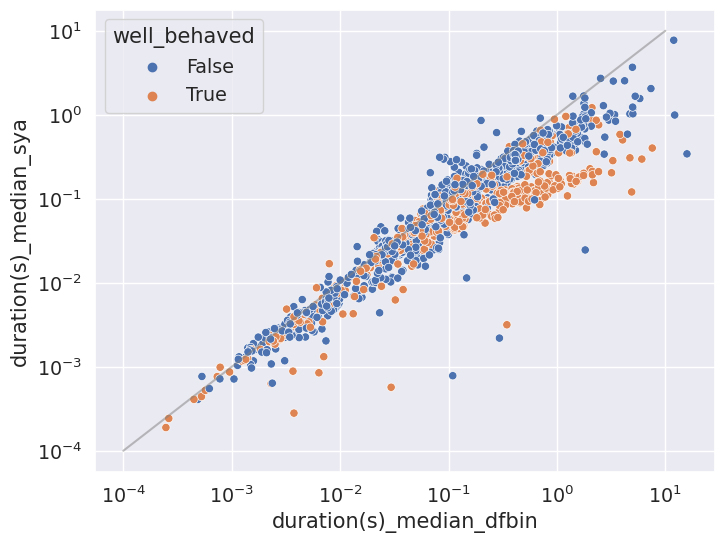

In [31]:
x = "duration(s)_median_dfbin"
y = "duration(s)_median_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")

## DuckDB-Bin v.s. SYA

In [32]:
# merged.loc[["33c","11d","8c"]][["duration(s)_median_dfbin","duration(s)_median_sya","hashjoin_time(s)_median_dfbin", "hashjoin_time(s)_median_sya"]]

Max. slowdown:      4.755x 	(query yago_acyclic_chain_12_26, x=0.060s, y=0.284s)
Max. abs. slowdown: 5.495s 	(query yago_acyclic_tree_6_38, x=2.189s, y=7.684s)
Max. speedup:       801.219x 	(query dblp_acyclic_212_16, x=77.537s, y=0.097s)
Max. abs. speedup:  77.440s 	(query dblp_acyclic_212_16, x=77.537s, y=0.097s)
-----------------------------------------------
Total: 1594, epsilon: 0.01
Number of dots above the line: 228 (14.30%)
Number of dots below the line: 1355 (85.01%)
Number of dots on the line 11 (0.69%)


<Axes: xlabel='hashjoin_time(s)_median_duckdbbin', ylabel='hashjoin_time(s)_median_sya'>

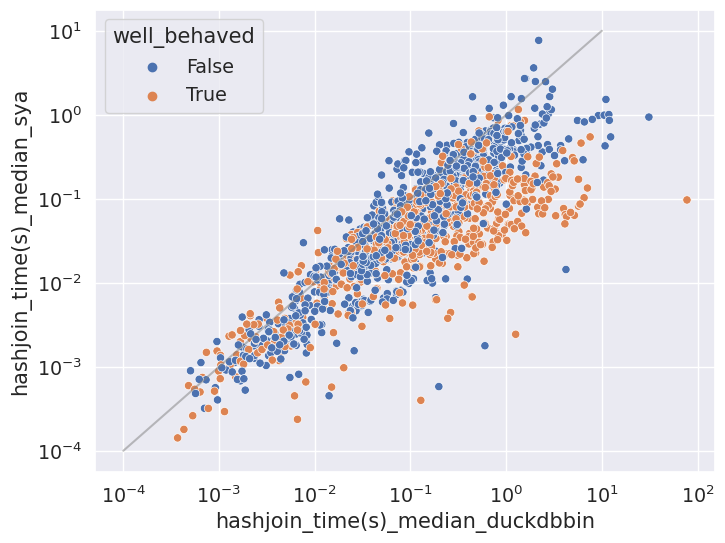

In [33]:
x = "hashjoin_time(s)_median_duckdbbin"
y = "hashjoin_time(s)_median_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")

Max. slowdown:      3.737x 	(query watdiv_acyclic_216_18, x=0.099s, y=0.369s)
Max. abs. slowdown: 5.476s 	(query yago_acyclic_tree_6_38, x=2.238s, y=7.714s)
Max. speedup:       643.790x 	(query dblp_acyclic_212_16, x=77.555s, y=0.120s)
Max. abs. speedup:  77.435s 	(query dblp_acyclic_212_16, x=77.555s, y=0.120s)
-----------------------------------------------
Total: 1594, epsilon: 0.01
Number of dots above the line: 222 (13.93%)
Number of dots below the line: 1359 (85.26%)
Number of dots on the line 13 (0.82%)


<Axes: xlabel='duration(s)_median_duckdbbin', ylabel='duration(s)_median_sya'>

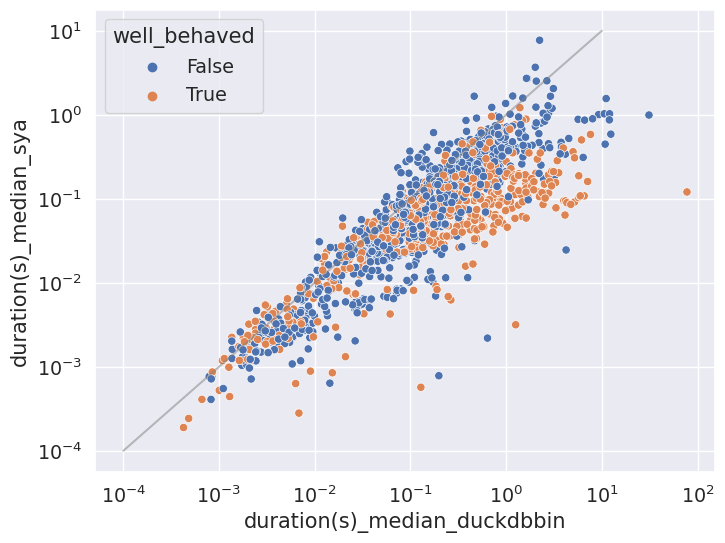

In [34]:
x = "duration(s)_median_duckdbbin"
y = "duration(s)_median_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")